## Base de consumo de agua por manzana en la Ciudad de México.

## Nota aclaratoria


Se agrega la información de las variables según la nota aclaratoria de los datos encontrada en: https://datos.cdmx.gob.mx/api/datasets/1.0/consumo-agua/attachments/nota_aclaratoria_xlsx/

**Tipos de emisión**

* Consumo medido: Tratándose de tomas de agua donde se encuentre instalado o autorizado el medidor de consumo por parte del Sistema de Aguas.
* Consumo promedio: El consumo promedio se considerará de la siguiente manera:
    - A falta de aparato medidor, en proceso de instalación o por imposibilidad material para ser instalado, dicho consumo promedio corresponderá a la colonia catastral en el que se encuentra el inmueble en que esté instalada la toma, siempre y cuando dicha colonia catastral el número de tomas con servicio medido sea mayor o igual al 70% del total de las tomas existentes en la colonia. El Sistema de Aguas publicará anualmente en la Gaceta Oficial de la Ciudad de México, la lista de las colonias catastrales que vayan contando con un 70% o más tomas con servicio medido, así como el consumo promedio de cada una de ellas en el ejercicio fiscal inmediato anterior.
    - Por descompostura del aparato medidor de consumo o cuando exista la imposibilidad de efectuar su lectura, se pagará tomando como base el consumo promedio de los últimos seis bimestres medidos del mismo uso que el actual anteriores al que se factura, sin que exceda de los últimos cinco ejercicios fiscales, quedando fuera de la estadística, el bimestre con facturación más alta.

**Uso**

* Doméstico: Inmuebles de uso Habitacional.
* No Doméstico: Inmuebles de uso no Habitacional.
* Mixto: Inmuebles de uso Doméstico y No Doméstico simultáneamente.

**Manzana**

* Es un segmento de la región que regularmente está delimitado por tres o más calles o límites semejantes, representada por los tres siguientes dígitos del mencionado número de cuenta catastral.

**Región**

* Circunscripción convencional del territorio de la Ciudad de México determinada con fines de control catastral de los inmuebles, representada por los tres primeros dígitos del número de cuenta catastral asignado por la autoridad fiscal.

**Índice de Desarrollo**

* Índice de Desarrollo: Construcción estadística mediante variables de tipo socioeconómico derivadas de información oficial, permite diferenciar territorialmente a la población de la Ciudad de México de acuerdo a su nivel de desarrollo económico, agregando la información a nivel manzana.
    - Popular: Clasificación que engloba a las manzanas que guardan características socioeconómicas similares y que se tipifican por tener los niveles de desarrollo más bajos de la Ciudad. En esta categoría se agrupa, además, las manzana que se encuentran dentro de la zona rural de la Ciudad de México.
    
    - Bajo: Clasificación que engloba a las manzanas que guardan características socioeconómicas similares y que se tipifican por tener niveles de desarrollo bajo de la Ciudad.
    
    - Medio: Clasificación que engloba a las manzanas que guardan características socioeconómicas similares y que se tipifican por tener niveles de desarrollo medio de la Ciudad.
    
    - Alto: Clasificación que engloba a las manzanas que guardan características socioeconómicas  similares y que se tipifican por tener niveles los más altos niveles de desarrollo de la Ciudad.

## Análisis Exploratorio de Datos de la base de consumo de agua por manzana en la Ciudad de México.



Una vez hecha la carga, limpieza y transformación de la información, se obtuvieron las siguientes variables:

**Variables numéricas:**

* consumo_total_mixto,     float64
* anio,                     int64
* consumo_prom_dom,        float64
* consumo_total_dom,       float64
* consumo_prom_mixto,      float64
* consumo_total,           float64
* consumo_prom,            float64
* consumo_prom_no_dom,     float64
* consumo_total_no_dom,    float64
* latitud,                 float64
* longitud,                float64

**Variables categóricas:**

* nomgeo,                   object
* alcaldia,                 object
* colonia,                  object
* bimestre,                 object
* gid,                      object
* indice_des,               object

Variables que antes tenían los siguientes nombres:

In [1]:
import load_data
import clean_data
import transform_data
import eda

datos=load_data.carga_archivo('consumo-agua.csv')
clean_data.estandariza_variables(datos)
transform_data.separar_variable(datos,'geo_point','latitud','longitud',',')
transform_data.eliminar_variable(datos,'geo_point')
transform_data.eliminar_variable(datos,'geo_shape')
transform_data.cambiar_tipo_variable(datos,'latitud','float64')
transform_data.cambiar_tipo_variable(datos,'longitud','float64')
transform_data.cambiar_tipo_variable(datos,'bimestre','str')
transform_data.cambiar_tipo_variable(datos,'gid','str')
transform_data.cambiar_minusculas_variable(datos,'colonia')
transform_data.cambiar_minusculas_variable(datos,'alcaldia')
transform_data.cambiar_minusculas_variable(datos,'indice_des')
transform_data.quitar_acentos(datos)

Antes:

 Index(['Geo Point', 'Geo Shape', 'consumo_total_mixto', 'anio', 'nomgeo',
       'consumo_prom_dom', 'consumo_total_dom', 'alcaldia', 'colonia',
       'consumo_prom_mixto', 'consumo_total', 'consumo_prom',
       'consumo_prom_no_dom', 'bimestre', 'consumo_total_no_dom', 'gid',
       'indice_des'],
      dtype='object') 
 
Ahora:

 Index(['geo_point', 'geo_shape', 'consumo_total_mixto', 'anio', 'nomgeo',
       'consumo_prom_dom', 'consumo_total_dom', 'alcaldia', 'colonia',
       'consumo_prom_mixto', 'consumo_total', 'consumo_prom',
       'consumo_prom_no_dom', 'bimestre', 'consumo_total_no_dom', 'gid',
       'indice_des'],
      dtype='object')


Y a las cuales se les aplicó un resúmen estadístico (data profiling), dando por resultado lo siguiente:

**Data profiling de las variables numéricas:**

In [2]:
eda.tabla_estadisticos_descriptivos_variables_numericas(datos)

,consumo_total_mixto,anio,consumo_prom_dom,consumo_total_dom,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,consumo_total_no_dom,latitud,longitud
max,23404.440000,2019.0,7796.410000,95060.690000,11702.220000,119726.940000,89691.773438,89691.773438,119726.940000,19.579103,-98.950469
min,0.000000,2019.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.135867,-99.337703
mean,174.359929,2019.0,29.132386,1186.263611,50.636234,1695.847222,111.217399,126.760172,436.060309,19.392273,-99.132896
std,312.663596,0.0,64.565925,2771.038307,130.408673,3555.697457,1069.949262,1095.817805,2126.152162,0.070549,0.057890
q25,0.000000,2019.0,18.690547,161.635000,0.000000,340.952500,23.010139,6.275417,10.980000,19.344073,-99.172484
median,79.940000,2019.0,26.414248,604.185000,33.451667,896.175000,31.693818,19.280000,54.055000,19.392910,-99.135196
q75,233.320000,2019.0,36.246563,1261.445000,61.216548,1808.902500,45.484917,54.186875,230.430000,19.446818,-99.096633
skew,21.765355,0.0,74.818629,12.523204,43.600444,10.998260,43.382682,40.716543,22.507368,-0.220968,0.124723
kurt,1419.360189,0.0,7663.654738,248.041305,3263.991441,195.877528,2599.541185,2364.161672,798.074926,-0.329997,0.033179
count,62775.000000,71102.0,66282.000000,66282.000000,62775.000000,71102.000000,71102.000000,71102.000000,71102.000000,71102.000000,71102.000000


**Hallazgos:**

* Identificamos que los valores máximos de las variables de consumo son signicativamente más grandes que el cuantil del 75%, lo cual indica que existen valores atípicos con consumos extremadamente altos.
* Observamos que el valor mínimo de las variables de consumo es cero lo cual indicaría que no hay una medición en algunas de las manzanas.
* La media del consumo total en establecimientos domésticos es superior al consumo total en no domésticos y establecimientos mixtos.
* Sin embargo, la media del consumo promedio en establecimientos no domésticos es la más grande, seguido de los mixtos y por último, los  domésticos. 
* El consumo total siempre es mayor o igual al consumo promedio ya que basados en la nota aclaratoria de los datos, el consumo promedio se considera cuando no hay un aparato medidor instalado o por descomportura que imposibilite la lectura del consumo.
* Las desviaciones estándar son altas respecto a la media debido a los valores atípicos que identificamos en los máximos.
* El quantil 25% del consumo de establecimientos mixtos es cero, lo que pudiera indicar que se omitió el reporte de consumo en esas manzanas.
* En general, observamos amplias diferencias entre las medias y las medianas de los consumos. Esto sugiere que la distribución de las variables no es simétrica con respecto a la media.
* La mediana siempre es menor a la media, lo cual significa que la distribución de las variables tienen sesgo positivo (están sesgadas a la derecha). Adicionalmente, esto se puede corroborar con el coeficiente de simetría (skew) que siempre es mayor a cero en todas las variables.
* Dados los coeficientes de curtosis (kurt) mayores a cero, notamos que todas las variables son leptocúrticas.
* Sólo en los consumos mixtos y domésticos se encontraron valores faltantes. La proporción de missings en establecimientos mixtos supera el 10% del total de los registros.
* En ningún caso, se encontraron valores faltantes en las variables de consumo de establecimientos no domésticos, lo cual puede ser un error ya que esto implica que en todas las manzanas siempre hay establecimientos de este tipo (pero sabemos que esto no pasa en manzanas exclusivas para zonas residenciales).

**Data profiling de las variables categóricas:**

In [3]:
eda.tabla_estadisticos_descriptivos_variables_categoricas(datos)

,nomgeo,alcaldia,colonia,bimestre,gid,indice_des
count,71102,71102,71102,71102,71102,71102
uniques,17,16,1340,3,71102,4
uniques_list,"[Azcapotzalco, Venustiano Carranza, Milpa Alta...","[azcapotzalco, venustiano carranza, milpa alta...","[tierra nueva, san antonio, ex hacienda del ro...","[1, 2, 3]","[10206, 10203, 10211, 10217, 10220, 10252, 102...","[bajo, medio, popular, alto]"
missings,0,0,0,0,0,0
prop_missings,0,0,0,0,0,0


**Hallazgos:**

* No se cuenta con valores nulos en la base.
* Podemos notar que la variable gid no tiene valores repetidos y podríamos identificarla como un id.
* Encontramos que en la variable nomgeo existe un error de captura ya que se encontraron 17 valores únicos en los que se distingue la delegación tlalpan y talpan. Por otro lado, la variable de alcaldias tiene 16 valores únicos y la observación de talpan no existe. Por ello, omitiremos del análisis nomgeo y en su lugar sólo usaremos la de alcaldía.
* Se encontraron un total de 1,340 colonias en la base de consumo de agua de CDMX.
* La variable indice_des se divide en 4 categorías: alto, medio, bajo y popular.
* Sólo se tiene información de los primeros 3 bimestres del año 2019.


Respecto a lo anterior, podemos hacernos las siguientes **preguntas:**

1. ¿Cómo es el consumo de agua promedio por manzana en cada alcaldía?
2. ¿Se mantiene el nivel de consumo de agua en colonias de una misma alcaldía?
3. ¿Entre más alto es el índice de desarrollo, mayor el consumo de agua?
4. ¿El mayor consumo de agua se da en los establecimientos mixtos? ¿Cómo es el consumo de agua por cada tipo?
5. ¿Hay diferencias significativas en el consumo de agua total por bimestre? 

Para responderlas y poder comprender más los datos se realizaron las siguientes **gráficas:**


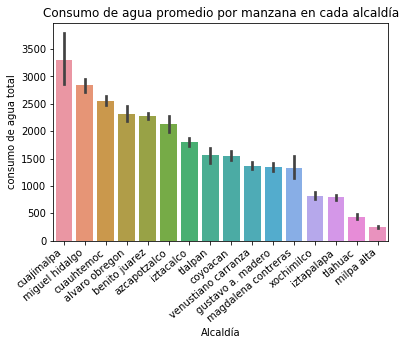

In [4]:
eda.grafico_barplot_orden_decreciente(datos,'alcaldia','consumo_total','Alcaldía','consumo de agua total','Consumo de agua promedio por manzana en cada alcaldía')

En la cual podemos observar que el consumo de agua total promedio por manzana es superior en la alcaldía de Cuajimalpa, seguida por Miguel Hidalgo. Mientras que Milpa Alta y Tlahuac son las delegaciones con menor consumo.

In [5]:
eda.tabla_ranking_n(datos,15,"colonia","alcaldia",'consumo_total')

,,consumo_total
colonia,alcaldia,
d. m. nacional,gustavo a. madero,62143.291667
santa fe la loma,alvaro obregon,29945.490000
aeropuerto internacional de la cd de mex,venustiano carranza,26990.713333
u. hab. acueducto de guadalupe,gustavo a. madero,25990.270769
unidad cuitlahuac,azcapotzalco,23575.361111
lindavista vallejo 2a. seccion,gustavo a. madero,22813.925000
narciso mendoza,tlalpan,22072.067222
ex hacienda de tarango,alvaro obregon,21927.130000
carola,alvaro obregon,21286.220833


En total, la base cuenta con 1,340 colonias por lo que no es posible hacer un análisis gráfico donde podamos visualizar todas las categorías. Por ello, se tabularon los consumos promedios de agua total de las 15 colonias más altas para verificar si el consumo promedio se mantiene similar en las colonias que pertenecen a una misma alcaldía. Sin embargo, vemos que el consumo por colonia es muy distinto incluso dentro de una misma alcaldía. Por ejemplo, arriba vimos que el consumo promedio de agua en Cuajimalpa e Hidalgo son los más altos. Sin embargo, sólo hay una colonia de Cuajimalpa en el top15 y ninguna de Miguel Hidalgo

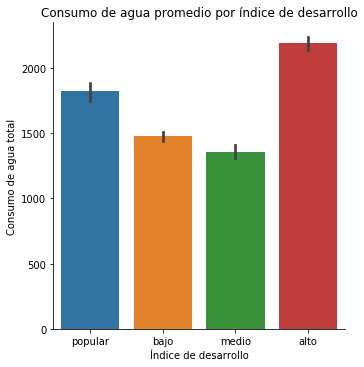

In [6]:
eda.grafico_barplot_orden_en_barras(datos,'indice_des','consumo_total',['popular','bajo','medio','alto'],'Índice de desarrollo','Consumo de agua total','Consumo de agua promedio por índice de desarrollo')

No se encontró que el consumo de agua promedio aumentara conforme al índice de desarrollo. Dado que el consumo popular es más grande que en bajo y medio. El índice de desarrollo medio es menor que el popular y bajo, pero el alto es el nivel con mayor consumo.

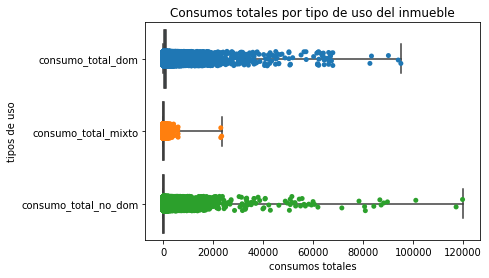

In [11]:
eda.grafico_tipo_uso(datos,'total','consumos totales','tipos de uso','Consumos totales por tipo de uso del inmueble')

Se encontró que los establecimientos que pertenecen al rubro mixto por lo regular presentan un menor consumo total mientras que los establecimientos para usos domésticos y no domésticos tienen consumos mucho más grandes.

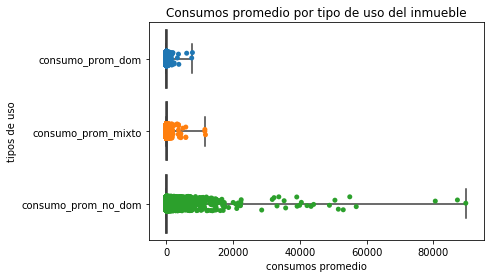

In [12]:
eda.grafico_tipo_uso(datos,'prom','consumos promedio','tipos de uso','Consumos promedio por tipo de uso del inmueble')

Por otro lado, los consumos promedio tienen un comportamiento totalmente distinto. Ya que los consumos promedio de los no domicilios son mucho más altos que los consumos promedio en domicilios y mixtos que son muy similares.

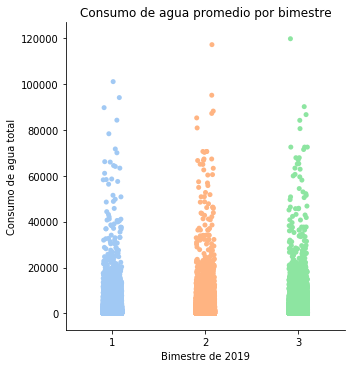

In [7]:
eda.grafico_strip(datos,'bimestre','consumo_total','Bimestre de 2019','Consumo de agua total','Consumo de agua promedio por bimestre')

Se observa que en general el consumo promedio por manzana no varía por bimestre en 2019. Por lo que esta variable no se incluiría en el modelo predictivo.

**Identificación de variables a utilizar para un posible modelo de predicción de alto consumo de agua (supervisado, clasificación)**

Con el objetivo de generar un modelo predictivo del consumo de agua, pensamos utilizar las variables que en el análisis exploratorio encontramos muy relacionadas con el nivel de consumo, las cuales fueron:

* Alcaldía
* Colonia
* Índice de desarrollo

A su vez, pensamos que valdría la pena elaborar un modelo predictivo de clasificación dividido de la siguiente forma:

* Consumo total de agua para uso mixto y para el resto de los usos
* Consumo promedio para uso de no domicilios y para el resto de los usos